# Proyecto 2 - 3 Introducción a la Ciencia de Datos
## Elaborado por:
- Juan Sebastián Gómez Agudelo - 2259474
- Stiven Henao Aricapa - 2259603
- Víctor Manuel Hernández Ortíz - 2259520

# 3. Implementación de Modelos Predictivos

## Elecciones
En nuestro caso hemos decido implementar los modelos **Grandient Boosting** y **Random Forest** ya que para este caso son los más idoneos.

Aun así, como ejercicio comparativo, vamos a implementar todos los modelos de regresión que hemos visto a lo largo de las clases, ver sus ventajas, desventajas y resultados.

### Preparación inicial de datos

In [2]:
## Importacion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import (mean_squared_error, r2_score)

In [49]:
# importo el dataset transformado
df = pd.read_csv('avocado_transformado.csv')
df.info()

# transformamos la columna de region a dummie
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df

# Dividir en x e y
y = df['AveragePrice']
x = df.drop(columns=['AveragePrice'])
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15702 entries, 0 to 15701
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AveragePrice                15702 non-null  float64
 1   Total Volume                15702 non-null  float64
 2   Pequeño/Mediano             15702 non-null  float64
 3   Grande                      15702 non-null  float64
 4   Extra Grande                15702 non-null  float64
 5   Total Bags                  15702 non-null  float64
 6   Small Bags                  15702 non-null  float64
 7   Large Bags                  15702 non-null  float64
 8   XLarge Bags                 15702 non-null  float64
 9   region                      15702 non-null  object 
 10  Dias_Desde_Primer_Registro  15702 non-null  int64  
 11  type_ORGANIC                15702 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 1.4+ MB


,AveragePrice,Total Volume,Pequeño/Mediano,Grande,Extra Grande,Total Bags,Small Bags,Large Bags,XLarge Bags,Dias_Desde_Primer_Registro,...,region_SOUTHEAST,region_SOUTH_CAROLINA,region_SOUTH_CENTRAL,region_SPOKANE,region_ST_LOUIS,region_SYRACUSE,region_TAMPA,region_TOTAL_U_S,region_WEST,region_WEST_TEX_NEW_MEXICO
0,0.433673,0.060322,0.001258,0.062893,0.000250,0.013962,0.014992,0.000175,0.0,357,...,False,False,False,False,False,False,False,False,False,False
1,0.443878,0.051521,0.000818,0.051556,0.000303,0.015260,0.016394,0.000183,0.0,350,...,False,False,False,False,False,False,False,False,False,False
2,0.229592,0.111082,0.000964,0.126063,0.000678,0.013077,0.014014,0.000193,0.0,343,...,False,False,False,False,False,False,False,False,False,False
3,0.306122,0.074196,0.001374,0.083129,0.000377,0.009329,0.009893,0.000251,0.0,336,...,False,False,False,False,False,False,False,False,False,False
4,0.408163,0.047913,0.001142,0.050631,0.000394,0.009928,0.010431,0.000370,0.0,329,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15697,0.586735,0.015976,0.002484,0.001766,0.000000,0.021671,0.022770,0.000809,0.0,1127,...,False,False,False,False,False,False,False,False,False,True
15698,0.627551,0.012979,0.001446,0.003963,0.000000,0.014874,0.015579,0.000609,0.0,1120,...,False,False,False,False,False,False,False,False,False,True
15699,0.709184,0.012865,0.001446,0.002833,0.003783,0.015082,0.016296,0.000079,0.0,1113,...,False,False,False,False,False,False,False,False,False,True
15700,0.739796,0.015158,0.001854,0.003443,0.003778,0.017611,0.019028,0.000094,0.0,1106,...,False,False,False,False,False,False,False,False,False,True


In [5]:
# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Mostrar las formas de los conjuntos resultantes
print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")

Datos de entrenamiento: (12561, 63), (12561,)
Datos de prueba: (3141, 63), (3141,)


## Random Forest Regressor
### Que hace?
- Crear muchos árboles de decisión.

- Cada árbol se entrena con una muestra aleatoria del dataset (con reemplazo, esto se llama bootstrap sampling).

- Cada vez que el árbol toma una decisión sobre qué variable usar para dividir, elige aleatoriamente entre un subconjunto de las variables disponibles (feature bagging).

- La predicción final es el promedio de todas las predicciones de los árboles individuales (en regresión).

### Por que es bueno en este caso?
En general es bueno debido a que este dataset tiene complejidad (diferentes regiones, fechas, tipos), y Random Forest captura esa complejidad sin sobreajustar.
Especificamente lo que hace este modelo de predicción bueno en este caso es que
- reduce overfitting: datos como precio fluctuan mucho, este modelo captura tendencias sin memorizar ruidos
- **Maneja relaciones no lineales**: No asume relaciones lineales entre variables, el precio puede depender de combinaciones complemas de volumen, región y tipo.
- **Mejo de alta dimensionalidad:** puede trabajar bien bajo muchas variables. En este caso las fechas las tenemos codifcadas, los tipos, y las regiones, generando muchas columnas dummies.
- Robustez ante valores atípicos: los arboles son relativamente robustos a outliers, por tanto si hay precios extraños o volumenes anomalos, no afectan mucho al modelo.


In [61]:
# Entrenar el modelo
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=9,)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, n_estimators=300)

In [62]:
# calculo de R2 y MSE
y_pred_rf = rf_reg.predict(X_test)
MSE_RF = mean_squared_error(y_test, y_pred_rf)
R2_RF = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf):.3f}")
print(f"Random Forest R2: {r2_score(y_test, y_pred_rf):.3f}")

# Para Random Forest
importances_rf = rf_reg.feature_importances_

Random Forest MSE: 0.008
Random Forest R2: 0.758


### Interpretación de las graficas a continuación para la precisión de los modelos
Hemos decidido incluir estas graficas para acompañar visualmente las predicciones de los modelos, esta interpretación en general es la misma para las graficas del mismo tipo en los modelos que hemos implementado.

- Cada punto azul es una predicción hecha por el modelo para un dato de prueba.
- Si un punto está sobre la línea roja, significa que la predicción fue perfecta.
- Si un punto está por arriba de la línea roja, significa que el modelo sobreestimó el precio (predijo un valor mayor que el real).
- Si un punto está por debajo de la línea roja, significa que el modelo subestimó el precio (predijo un valor menor que el real).


| Observación  | Significado  |
|----------|----------|
| Puntos muy cerca de la línea roja |El modelo predice muy bien. | 
|Puntos muy dispersos respecto a la línea roja  | El modelo comete errores grandes.  | 
| Patrón de dispersión (curvaturas, formas raras)   | El modelo no capta bien alguna relación entre las variables.   | 


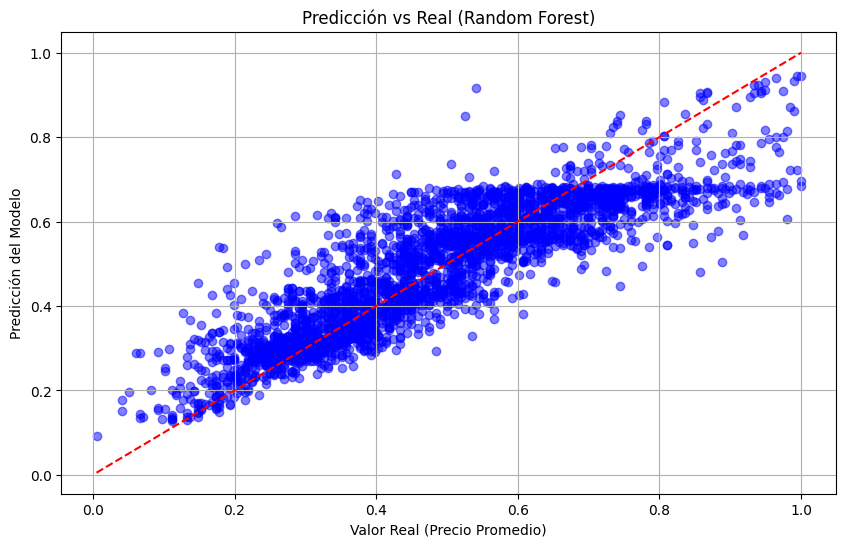

In [95]:
# grafico
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicción vs Real (Random Forest)')
plt.xlabel('Valor Real (Precio Promedio)')
plt.ylabel('Predicción del Modelo')
plt.grid(True)
plt.show()

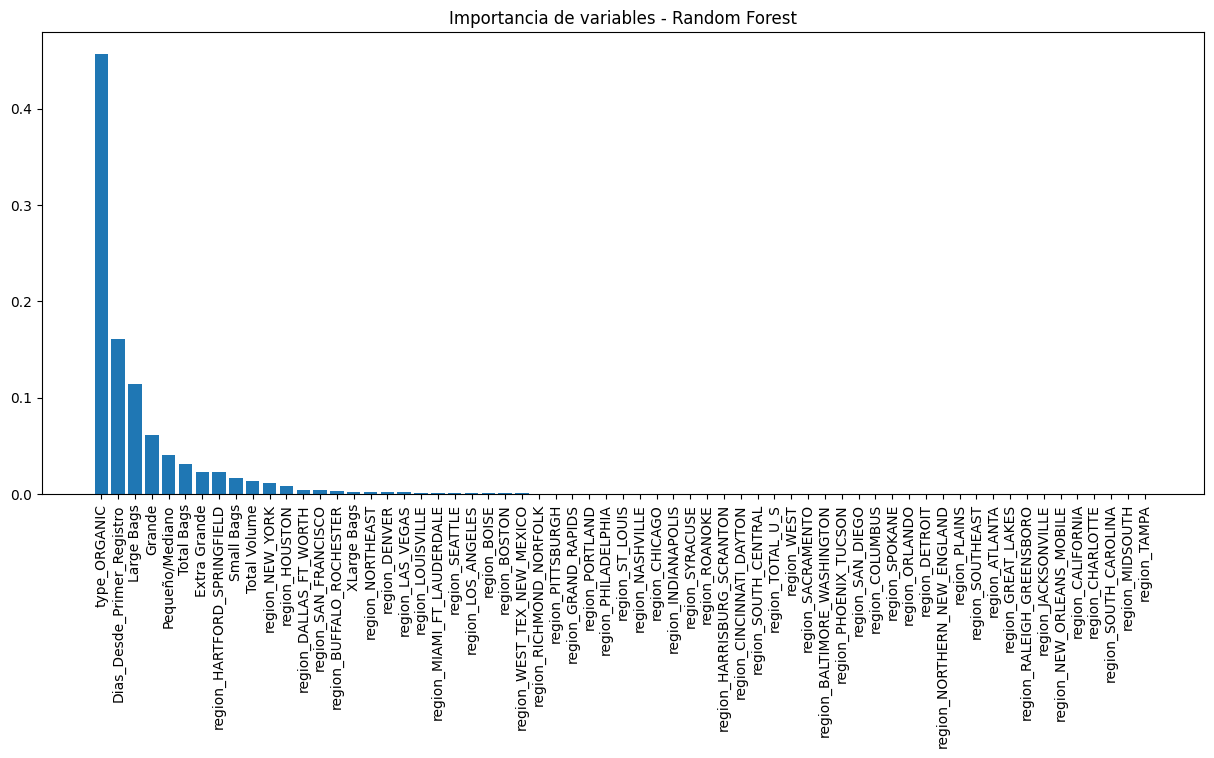

In [12]:
# Suponiendo que tienes los nombres de las columnas
feature_names = X_train.columns

# Para Random Forest
indices_rf = np.argsort(importances_rf)[::-1]  # Orden descendente
plt.figure(figsize=(15, 6))
plt.title("Importancia de variables - Random Forest")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices_rf], rotation=90)
plt.show()

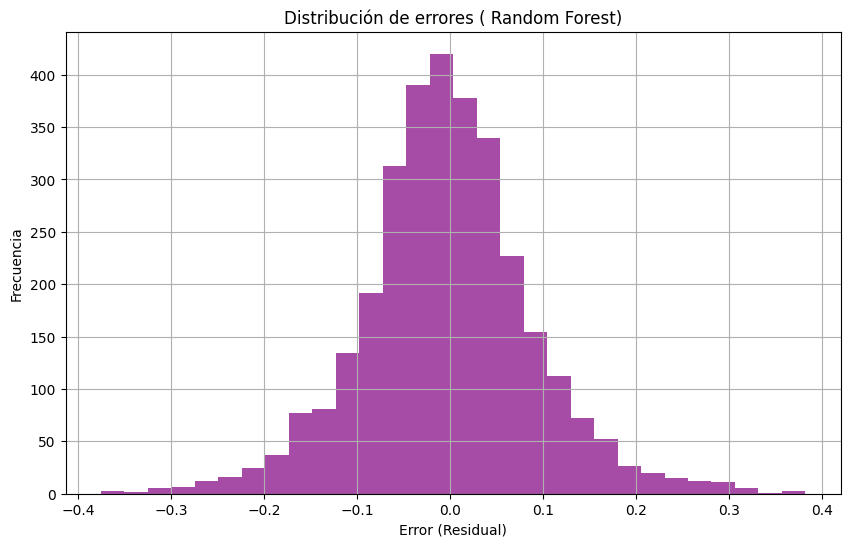

In [101]:
errors_rf = y_test - y_pred_rf

# Crear figura y eje
fig_rf, ax_rf = plt.subplots(figsize=(10, 6))

# Hacer la gráfica
ax_rf.hist(errors_rf, bins=30, color='purple',  alpha=0.7)
ax_rf.set_title('Distribución de errores ( Random Forest)')
ax_rf.set_xlabel('Error (Residual)')
ax_rf.set_ylabel('Frecuencia')
ax_rf.grid(True)

## Gradient Boosting Regressor
### Que hace?
Este es un modelo de ensamble de árboles de decisión, pero funciona diferente que Random Forest:

- Los árboles se construyen secuencialmente: Cada nuevo árbol intenta corregir los errores que cometieron los árboles anteriores.

- Funciona como una optimización: A cada paso, el modelo intenta minimizar una función de pérdida (por ejemplo, el error cuadrático) usando un método similar al gradiente descendente.

- Predicción final: **Se suman las predicciones de todos los árboles, pero cada uno contribuye con un pequeño peso.**
### Como funciona?
Primero, crea un árbol pequeño (normalmente poco profundo, tipo "weak learner") que intenta predecir el precio.

Luego, calcula el error (residuales) de ese primer árbol.

Después, crea un segundo árbol que intenta predecir ese error.

Y así sucesivamente, cada nuevo árbol corrige los errores de la suma de todos los árboles anteriores.

Finalmente, la predicción es la suma de todas las correcciones.
### Por que es bueno en este caso?
- Muy alta precision: ya que corrige iterativamente los errores, el precio del agucata puede depender de varias combinaciones sutiles de variables
- Manejo fino de errores: Se enfoca en corregir los errores más dificiles, en caso de que existan variaciones locales en precios segun región/fecha, este modelo las capta de forma adecuada
- Modela relaciones complejas: **Muy bueno** para relaciones nolineales y efectos de interacción entre variables, ya que variables como tipo, volumen, región interactuan de forma compleja.


In [43]:
gb_reg = GradientBoostingRegressor(n_estimators=10000, 
                                   learning_rate=0.05,
                                   max_depth=9,
                                   min_samples_split=10,
                                   min_samples_leaf=50,
                                   subsample=0.8,
                                   max_features='sqrt',
                                   )
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=9, max_features='sqrt',
                          min_samples_leaf=50, min_samples_split=10,
                          n_estimators=10000, subsample=0.8)

## Explicación de hiperparametros
Debido a que este fue el modelo el cual desde un inicio presento las mejores estadisticas sin tanto rodeo en los hiperparametros (un MSE bajo y un R2 alto) lo vimos como el modelo predilecto a ser el mejor para este caso, debido a ellos comenzamos a jugar con los hiperparametros para conseguir la mejor configuración, y con ello llegamos a los hiperparametros vistos anteriormente.

El tiempo de entrenamiento toma alrededor de 2 minutos.

- n_estimators: Número total de árboles que voy a entrenar. Cada árbol corrige los errores del árbol anterior. Más árboles pueden significar mejor rendimiento, pero también más tiempo de entrenamiento.

- learning_rate: Qué tanto dejo que cada nuevo árbol corrija los errores. Un learning_rate pequeño significa que cada árbol hace cambios pequeños (aprende lento), pero eso permite combinar muchos árboles y que el modelo generalice mejor.

- max_depth: Profundidad máxima de cada árbol. Controla cuánto puede aprender cada árbol individualmente. Árboles más profundos capturan relaciones más complejas, pero también corren más riesgo de sobreajuste.

- min_samples_split: Número mínimo de muestras necesarias para dividir un nodo. Si pongo un número pequeño, el árbol puede hacerse muy detallado (más complejo). Un número más grande fuerza al árbol a ser más simple.

- min_samples_leaf: Número mínimo de muestras que debe haber en una hoja (nodo terminal). Ayuda a evitar que el árbol aprenda demasiado ruido de los datos. Poner un valor más grande da lugar a árboles más "suaves" (menos sobreajuste).

- subsample: Proporción de muestras que uso para entrenar cada árbol. Un subsample menor que 1.0 introduce aleatoriedad (como en un random forest) y ayuda a que el modelo no se sobreentrene.

- max_features: Número de características (features) a considerar cuando busco la mejor división en cada nodo. Usar 'sqrt' significa que en cada división solo voy a considerar la raíz cuadrada del número total de características. Esto introduce más diversidad entre los árboles.


En este caso lo que estamos haciendo es:
- Construyendo 10,000 árboles, pero cada uno aprenderá despacio porque el learning_rate es 0.05.
- Cada árbol puede ser bastante profundo (max_depth=9), permitiéndole capturar patrones complejos en los datos.
- Un nodo se divide cuando tenga apenas 10 muestras (min_samples_split=10), permitiendo que el árbol crezca bastante detallado.
- Cada hoja debe tener al menos 50 muestras (min_samples_leaf=50), lo que impide que las ramas más profundas se sobreajusten a ruidos muy pequeños.
- Cada árbol se entrena usando solo el 80% de los datos (subsample=0.8), lo cual introduce variabilidad y ayuda a generalizar.
- Cada división de un árbol solo considera un subconjunto pequeño de variables (max_features='sqrt'), promoviendo árboles más diversos.


### Resultados (con una de las varias muestras que tomamos haciendo uso de este ajuste de hiperparametros)
**Gradient Boosting MSE: 0.00247:** El error cuadrático medio es muy bajo, lo cual significa que las predicciones del modelo están muy cerca de los valores reales en promedio.

**Gradient Boosting R²: 0.92959:** El modelo explica el 92.96% de la variabilidad de los precios promedio de los aguacates.
Esto quiere decir que el modelo está haciendo prediciendo adeucadamente el comportamiento de los precios.

In [44]:
y_pred_gb = gb_reg.predict(X_test)
MSE_GB = mean_squared_error(y_test, y_pred_gb)
R2_GB = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mean_squared_error(y_test, y_pred_gb):.5f}")
print(f"Gradient Boosting R2: {r2_score(y_test, y_pred_gb):.5f}")

importances_gbr = gb_reg.feature_importances_

Gradient Boosting MSE: 0.00247
Gradient Boosting R2: 0.92959


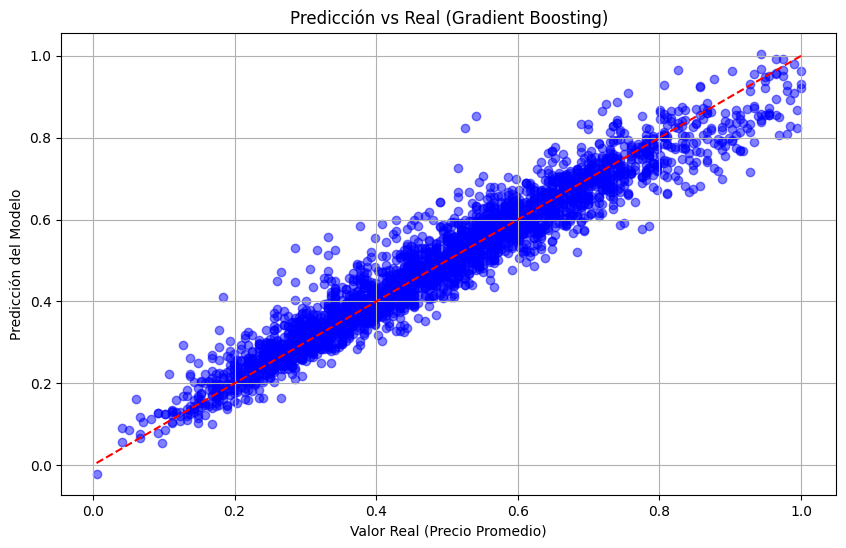

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicción vs Real (Gradient Boosting)')
plt.xlabel('Valor Real (Precio Promedio)')
plt.ylabel('Predicción del Modelo')
plt.grid(True)
plt.show()

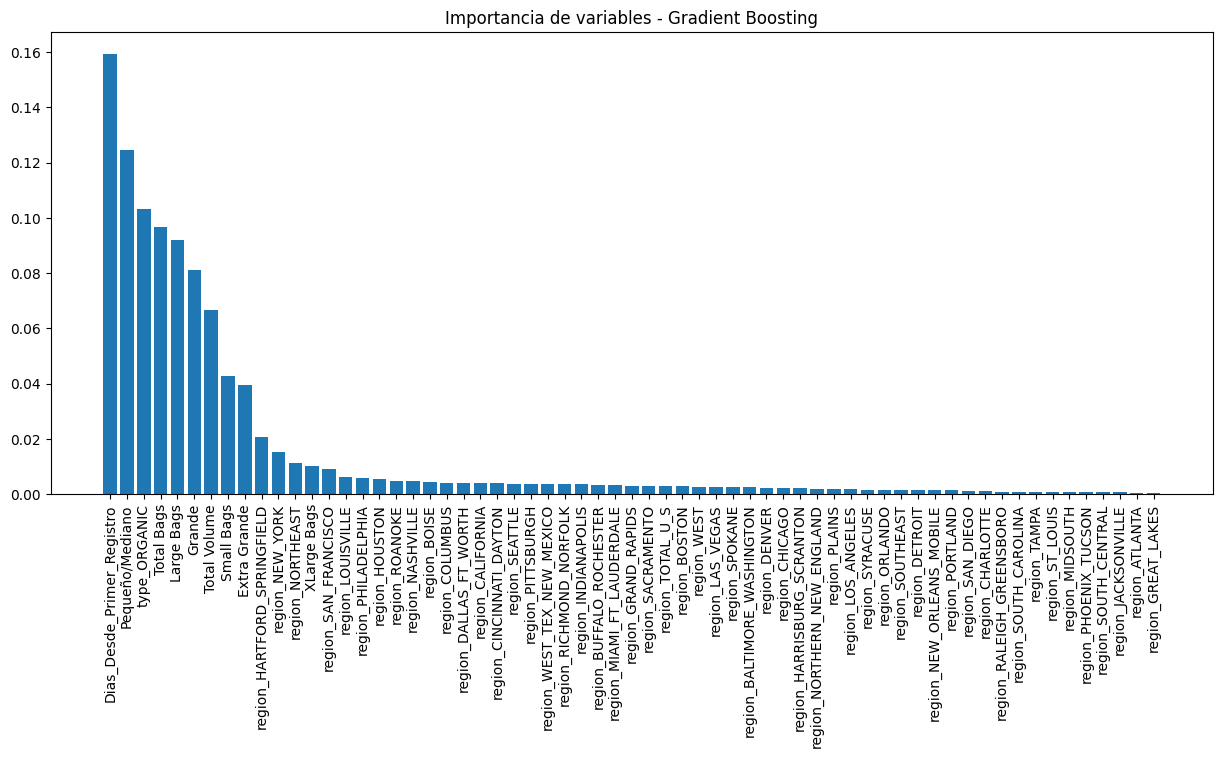

In [17]:
indices_gbr = np.argsort(importances_gbr)[::-1]
plt.figure(figsize=(15, 6))
plt.title("Importancia de variables - Gradient Boosting")
plt.bar(range(X_train.shape[1]), importances_gbr[indices_gbr], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices_gbr], rotation=90)
plt.show()

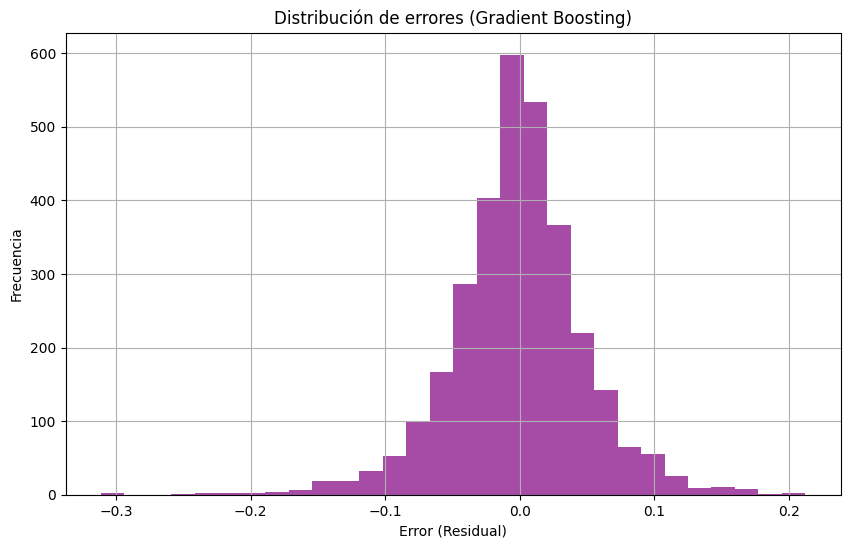

In [103]:
errors_gb = y_test - y_pred_gb

# Crear figura y eje
fig_gb, ax_gb = plt.subplots(figsize=(10, 6))

# Hacer la gráfica
ax_gb.hist(errors_gb, bins=30, color='purple',  alpha=0.7)
ax_gb.set_title('Distribución de errores (Gradient Boosting)')
ax_gb.set_xlabel('Error (Residual)')
ax_gb.set_ylabel('Frecuencia')
ax_gb.grid(True)

## Regresión Lineal

### Que es?
La Regresión Lineal es el modelo de predicción más simple que existe para problemas de regresión:
Supone que la relación entre las variables de entrada (X) y la salida (Y) es una línea recta (o un plano si hay varias variables).
Matemáticamente intenta ajustar una recta que minimiza el error cuadrático entre las predicciones y los valores reales.

### Que hace?
- Asume que cada variable (como Total Volume, type, region, year, etc.) tiene un efecto lineal en el precio.

- Calcula coeficientes 𝛽
β que indican cuánto sube o baja el precio por cada unidad de cambio en las variables.

- Predice el precio como una combinación lineal de las entradas.

### Ventajas:
- Muy rápido de entrenar.
- Fácil de interpretar.

### Desventajas:

- Asume relación lineal entre las variables y el precio.
- El mercado de aguacates probablemente no tiene una relación estrictamente lineal (hay estacionalidad, diferencias regionales, efectos no lineales...).

Puede servir como baseline (modelo de referencia sencillo), pero no esperaría que sea el mejor.

En pocas palabras, no es un modelo útil en este caso debido a que
- Relaciones no lineales: solo capta relaciones lineales, y en nuestro caso **el precio del aguacate varia de forma lineal con el volumen, region, tipo, fecha etc**
- Interacción de variables: No capta bien las interaccions entre variables, algunas variables en el dataset de aguacates interactuan de forma compleja (type, region) con los precios
- Outliers: Muy sensible a valores atipicos
- Underfitting: tiende a sar como salida un modelo muy simple que no se adapta bien, en este caso **se necesita un modelo que capture fluctuaciones reales del precio**

In [25]:
lr = LinearRegression( )
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred_lr = lr.predict(X_test)

In [27]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr, 'Error': y_test - y_pred_lr}) 
df_pred 

,Actual,Predicted,Error
3144,0.229592,0.322310,-0.092719
5843,0.443878,0.322383,0.121495
12395,0.954082,0.571421,0.382661
1274,0.255102,0.356321,-0.101219
5367,0.474490,0.317169,0.157321
...,...,...,...
6654,0.377551,0.325072,0.052479
14227,0.714286,0.655710,0.058575
4388,0.331633,0.377144,-0.045511
9080,0.744898,0.751549,-0.006651


In [30]:
print(f"Coeficientes: {lr.coef_}")
print(f"Intercepto: {lr.intercept_}")

Coeficientes: [ 1.74096438e+01 -1.36491252e+01 -1.43098525e+01 -3.18527131e+00
 -1.45615306e+04  1.34059221e+04  1.24650350e+04  1.02121379e+03
  7.91710178e-05  1.56222864e-01 -7.03707602e-02  6.60092267e-02
 -1.14648503e-01  3.04813627e-02 -1.72976005e-02  6.31112250e-03
  2.08248571e-02  5.52988743e-02 -1.47366848e-01 -1.47839427e-01
 -1.68516382e-01 -6.91024466e-02 -1.30735567e-01 -2.45823657e-02
 -8.52971496e-02 -4.96423421e-03  1.43391924e-01 -1.77616410e-01
 -1.17808800e-01 -2.82943948e-02 -7.00094392e-02 -1.18647944e-01
 -1.31333976e-01 -2.35476797e-02 -3.18168683e-02 -1.57046542e-01
 -1.08384805e-01  1.95814875e-01  1.12994780e-01 -6.89790924e-03
 -5.19601340e-04  7.71211788e-02 -2.83470990e-02 -9.70439542e-02
 -1.47902935e-03 -6.57525961e-02  3.10751163e-03 -1.17651492e-01
 -1.49676027e-01  5.52705022e-02 -3.79516554e-02  1.39860942e-01
 -7.06666406e-03 -3.22244975e-02 -4.85148688e-02 -1.61618124e-01
 -8.66167083e-02 -6.75633886e-02 -2.47640270e-02 -4.79929788e-02
  9.2074327

In [31]:
MSE_LR = mean_squared_error(y_test, y_pred_lr)
R2_LR = r2_score(y_test, y_pred_lr)
print(f"Error Cuadrático Medio: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R²: {r2_score(y_test, y_pred_lr)}")


Error Cuadrático Medio: 0.015867759345779258
R²: 0.5482862086589169


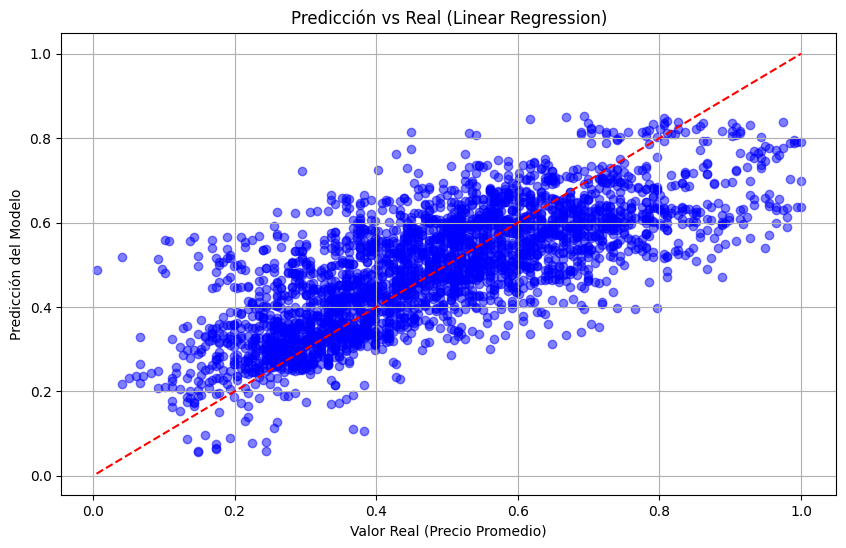

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicción vs Real (Linear Regression)')
plt.xlabel('Valor Real (Precio Promedio)')
plt.ylabel('Predicción del Modelo')
plt.grid(True)
plt.show()

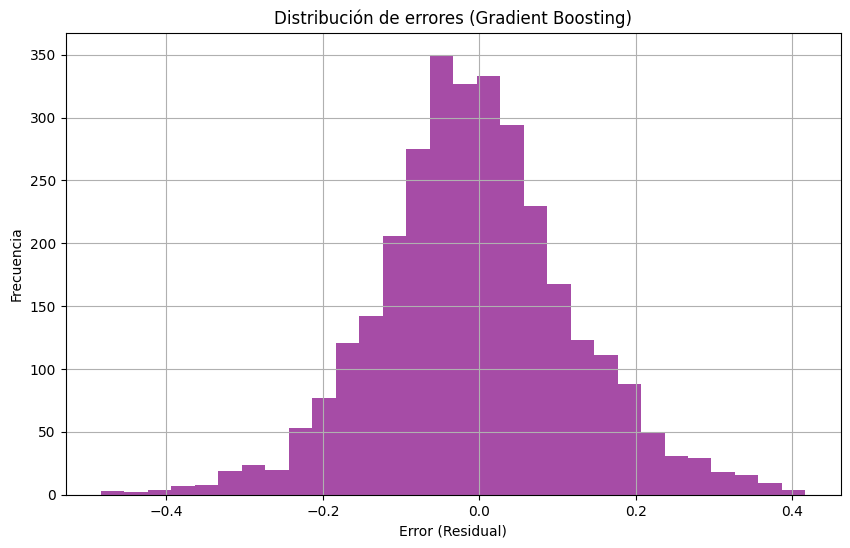

In [ ]:
errors_lr = y_test - y_pred_lr

# Crear figura y eje
fig_lr, ax_lr = plt.subplots(figsize=(10, 6))

# Hacer la gráfica
ax_lr.hist(errors_lr, bins=30, color='purple',  alpha=0.7)
ax_lr.set_title('Distribución de errores (Linear Regression)')
ax_lr.set_xlabel('Error (Residual)')
ax_lr.set_ylabel('Frecuencia')
ax_lr.grid(True)

## Decision Tree Regressor

### Que es?
Un árbol de decisión predice valores dividiendo el espacio de datos en partes, como si fueran "sí" y "no" en cada pregunta.

Crea una estructura de árbol donde:

- Cada nodo interno representa una condición sobre una variable (¿Total Volume > 10000?).

- Cada rama representa una decisión basada en esa condición.

- Cada hoja del árbol contiene el valor promedio de las observaciones que cayeron allí.


Matemáticamente, busca dividir los datos de manera que minimice el error cuadrático medio (MSE) en cada división.

### Que hace?
Aprende reglas simples tipo "si el volumen de ventas es alto y el tipo es 'conventional', entonces el precio promedio suele ser bajo".
Ajusta muy bien a datos que tienen patrones basados en umbrales claros (como por ejemplo cambios de precio por temporada o tipo).

### Ventaja	
- Capta relaciones no lineales y interacciones fácilmente.	
- Fácil de interpretar (puedes ver el árbol).
- No necesita normalizar datos o hacer preprocesamiento complejo.

### Desventaja
- Puede sobreajustar mucho si no limitas la profundidad.
- No generaliza tan bien como Random Forest o Boosting.
- Es muy sensible a cambios en los datos (pequeñas variaciones pueden cambiar mucho el árbol).

En general no es muy bueno ya que tiende a memorizar los datos de entrenamiento.

In [57]:
dt_reg = DecisionTreeRegressor(max_depth=8)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [87]:
y_pred_dt = dt_reg.predict(X_test)
MSE_DT = mean_squared_error(y_test, y_pred_dt)
R2_DT = r2_score(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_dt):.3f}")
print(f"Decision Tree R2: {r2_score(y_test, y_pred_dt):.3f}")
feature_names = x.columns
importances_dt = dt_reg.feature_importances_

Decision Tree MSE: 0.013
Decision Tree R2: 0.634


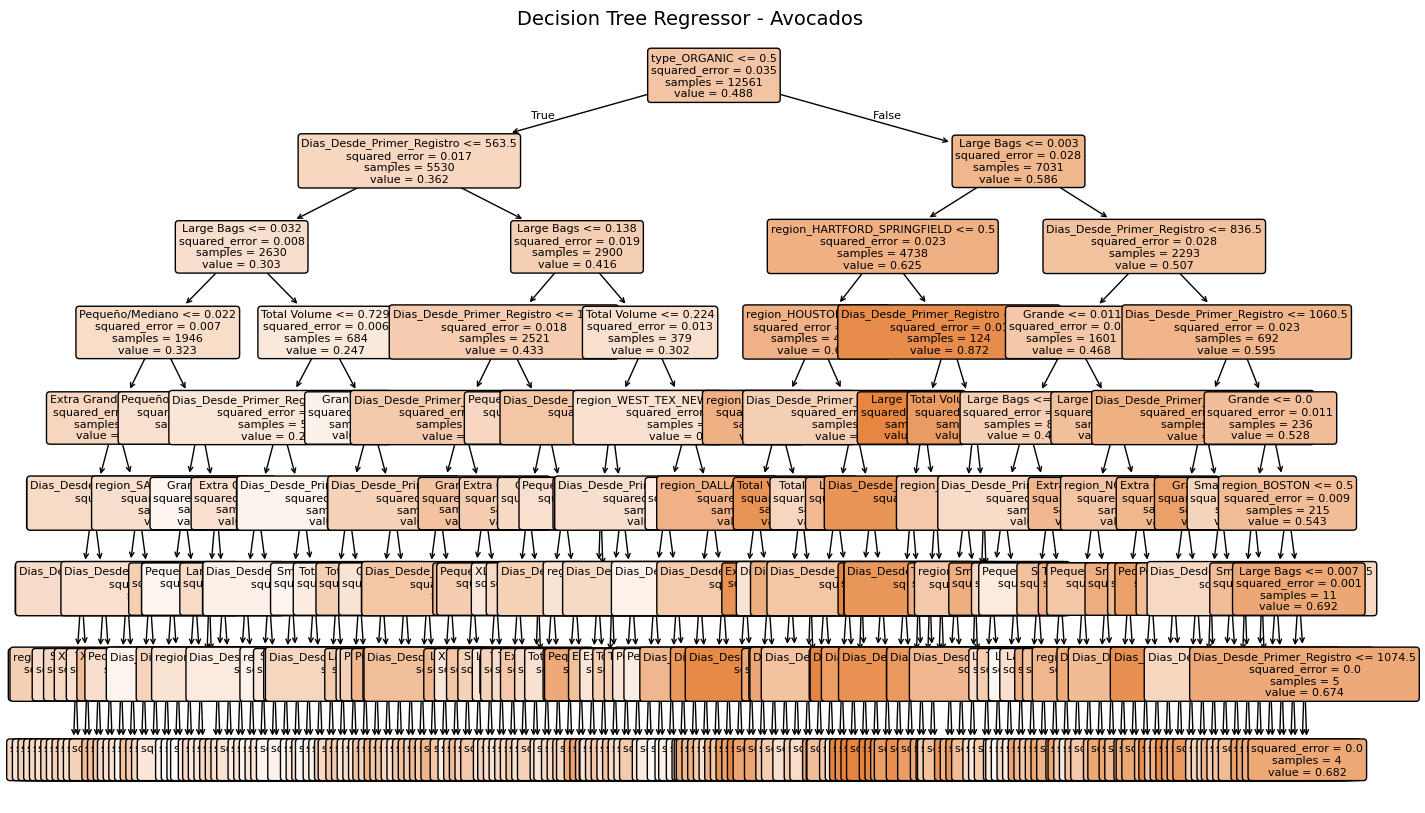

In [88]:
a = plt.figure(figsize=(16,10))
plot_tree(
    dt_reg,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Regressor - Avocados", fontsize=14)
plt.show()

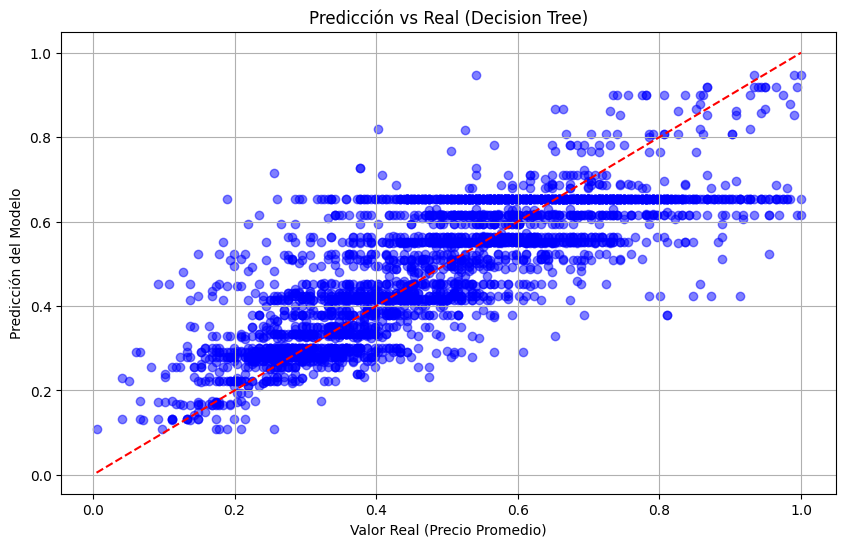

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicción vs Real (Decision Tree)')
plt.xlabel('Valor Real (Precio Promedio)')
plt.ylabel('Predicción del Modelo')
plt.grid(True)
plt.show()

## Que sucedió en la grafica?
Un árbol de decisión no predice valores continuos suaves como lo hace, por ejemplo, un modelo de regresión lineal o un Gradient Boosting.
- Lo que hace es dividir el espacio en regiones (particiones), y para cada región, predice un único valor constante (el promedio de los datos de esa hoja).
- Por eso muchas predicciones son exactamente iguales, incluso si los valores reales son muy variados.
- En la gráfica: eso se traduce en bandas horizontales donde todas las predicciones son iguales a pesar de que los valores reales (x) cambian mucho.



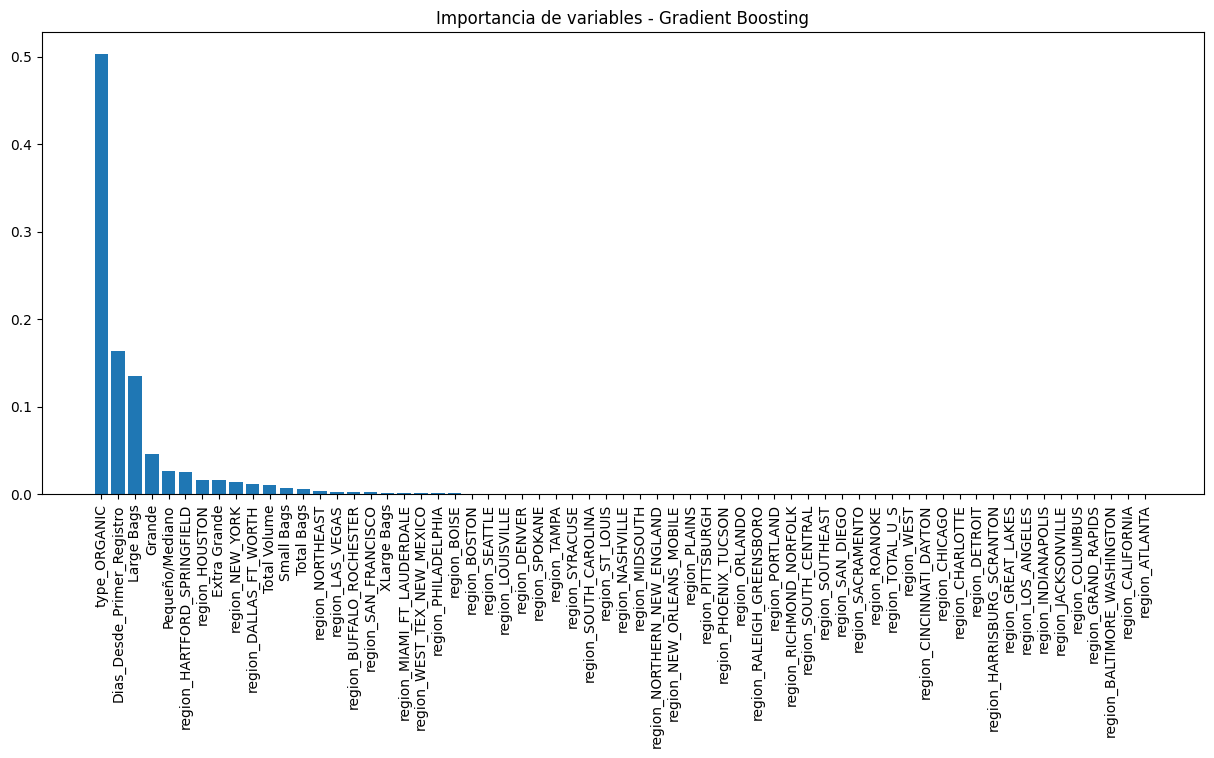

In [89]:
indices_dt = np.argsort(importances_dt)[::-1]
plt.figure(figsize=(15, 6))
plt.title("Importancia de variables - Gradient Boosting")
plt.bar(range(X_train.shape[1]), importances_dt[indices_dt], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices_dt], rotation=90)
plt.show()

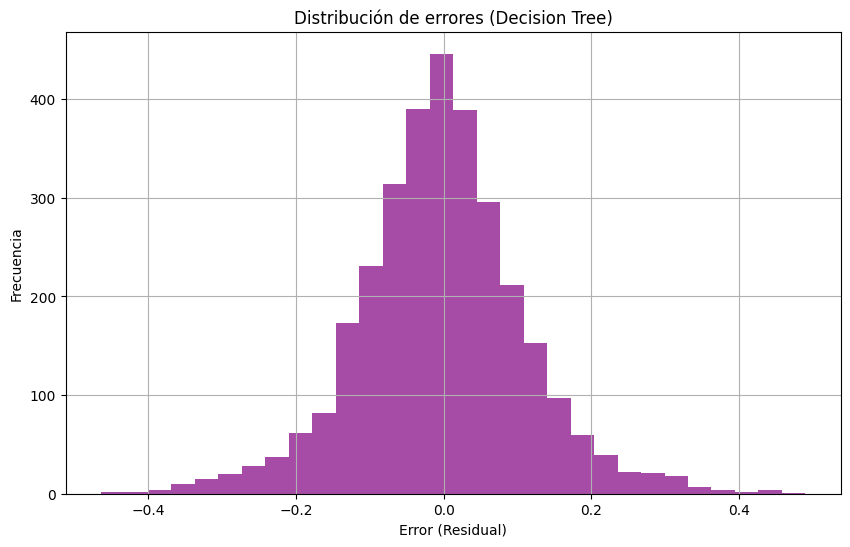

In [110]:
errors_dt = y_test - y_pred_dt

# Crear figura y eje
fig_dt, ax_dt= plt.subplots(figsize=(10, 6))

# Hacer la gráfica
ax_dt.hist(errors_dt, bins=30, color='purple',  alpha=0.7)
ax_dt.set_title('Distribución de errores (Decision Tree)')
ax_dt.set_xlabel('Error (Residual)')
ax_dt.set_ylabel('Frecuencia')
ax_dt.grid(True)

## MLP (Multilayer Perceptron - Red Neuronal)

### Que es?
Una MLP es una red neuronal densa, donde:
- Hay capas de neuronas (capas ocultas).
- Cada neurona combina la información de todas las entradas (con pesos y bias), pasa la suma por una función no lineal (ReLU, tanh, etc.).
La red aprende a ajustar los pesos para minimizar el error entre la predicción y el valor real (usando backpropagation y descenso del gradiente).

### Como funciona en el dataset de avocado:
La MLP puede capturar relaciones altamente no lineales.

Aprende combinaciones muy complejas entre variables como volumen, tipo, región, año, etc.

Puede encontrar patrones sutiles que árboles de decisión o modelos lineales no encuentran fácilmente.



Ventaja	
- Captura relaciones extremadamente complejas.
- Puede superar a modelos más simples si se entrena bien.
- Funciona bien con features no lineales y mezclas de variables.	
- Escalar las variables suele ser obligatorio para un buen desempeño.	

Desventaja
- Difícil de interpretar: es una "caja negra".
- Puede sobreajustar fácilmente si no usas técnicas como regularización o early stopping.
- Requiere mucho ajuste de hiperparámetros (capas, neuronas, tasa de aprendizaje).
- Necesita más datos para generalizar bien (sobre todo si la red es grande).

In [ ]:
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(500, 250, 70),
    activation='relu', 
    solver='adam',
    learning_rate_init=0.01,
    learning_rate='adaptive',
    alpha=0.001, 
    max_iter=2000,
    early_stopping=True, 
    verbose=True
)
mlp_reg.fit(X_train, y_train)

Iteration 1, loss = 1446.46922941
Validation score: -0.590009
Iteration 2, loss = 0.09227358
Validation score: -0.734623
Iteration 3, loss = 0.03799576
Validation score: -0.063284
Iteration 4, loss = 0.38017039
Validation score: -4.081279
Iteration 5, loss = 0.03886090
Validation score: -0.497498
Iteration 6, loss = 0.02457064
Validation score: -0.242295
Iteration 7, loss = 0.02538253
Validation score: -3.394428
Iteration 8, loss = 0.02763773
Validation score: -0.180904
Iteration 9, loss = 0.02869310
Validation score: -0.148826
Iteration 10, loss = 0.02058961
Validation score: -0.030743
Iteration 11, loss = 0.01884027
Validation score: 0.042890
Iteration 12, loss = 0.02247378
Validation score: -0.517972
Iteration 13, loss = 0.02101780
Validation score: 0.162018
Iteration 14, loss = 0.01843441
Validation score: 0.254204
Iteration 15, loss = 0.01771283
Validation score: 0.221228
Iteration 16, loss = 0.01465706
Validation score: -0.086452
Iteration 17, loss = 0.01743892
Validation score: 

MLPRegressor(alpha=0.001, early_stopping=True,
             hidden_layer_sizes=(500, 250, 70), learning_rate='adaptive',
             learning_rate_init=0.01, max_iter=2000, verbose=True)

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(100,50), (128,64), (256,128,64)],
    'learning_rate_init': [0.01, 0.001, 0.0005],
    'alpha': [0.001, 0.01, 0.1]
}

grid = GridSearchCV(MLPRegressor(
    activation='relu', solver='adam',
    early_stopping=True, max_iter=2000, random_state=42),
    param_grid, cv=3, verbose=3
)

grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01;, score=0.592 total time=   2.4s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01;, score=0.528 total time=   1.4s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01;, score=0.503 total time=   1.2s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001;, score=0.509 total time=   1.1s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001;, score=0.541 total time=   1.6s
[CV 3/3] END alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001;, score=0.523 total time=   1.6s
[CV 1/3] END alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.0005;, score=0.574 total time=   1.4s
[CV 2/3] END alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.0005;, score=0.597 total time=   2.3s
[CV 3/3] END alpha=0.001, hi

c:\Users\Victor\Universidad 2025-1\Introducción a la ciencia de datos\Proyecto2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [84]:
y_pred_mlp = mlp_reg.predict(X_test)
MSE_MLP = mean_squared_error(y_test, y_pred_mlp)
R2_MLP = r2_score(y_test, y_pred_mlp)
print(f"MLP Regressor MSE: {mean_squared_error(y_test, y_pred_mlp):.3f}")
print(f"MLP Regressor R2: {r2_score(y_test, y_pred_mlp):.3f}")

MLP Regressor MSE: 0.015
MLP Regressor R2: 0.576


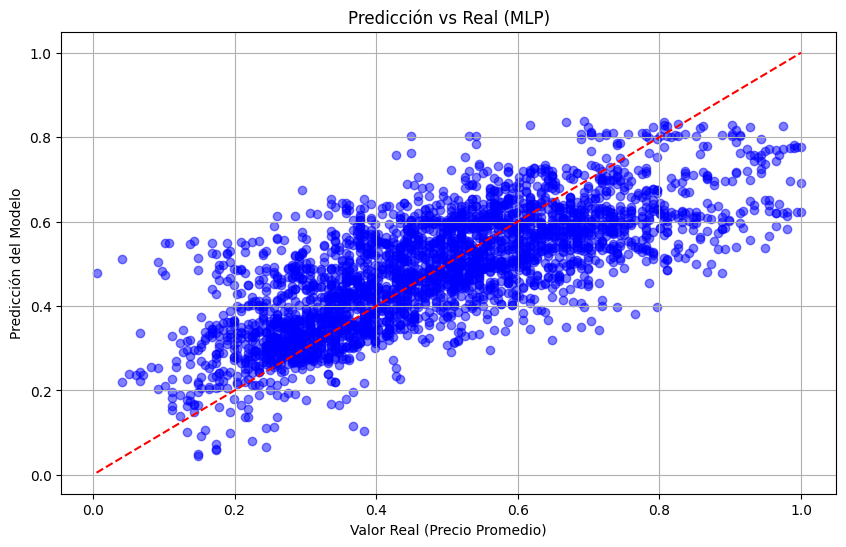

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicción vs Real (MLP)')
plt.xlabel('Valor Real (Precio Promedio)')
plt.ylabel('Predicción del Modelo')
plt.grid(True)
plt.show()

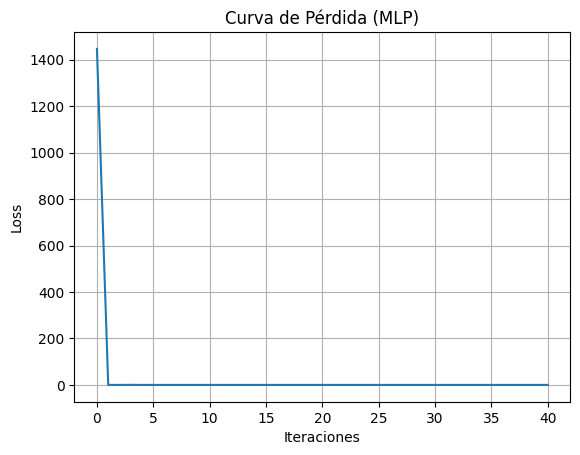

In [86]:
plt.plot(mlp_reg.loss_curve_)
plt.title('Curva de Pérdida (MLP)')
plt.xlabel('Iteraciones')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

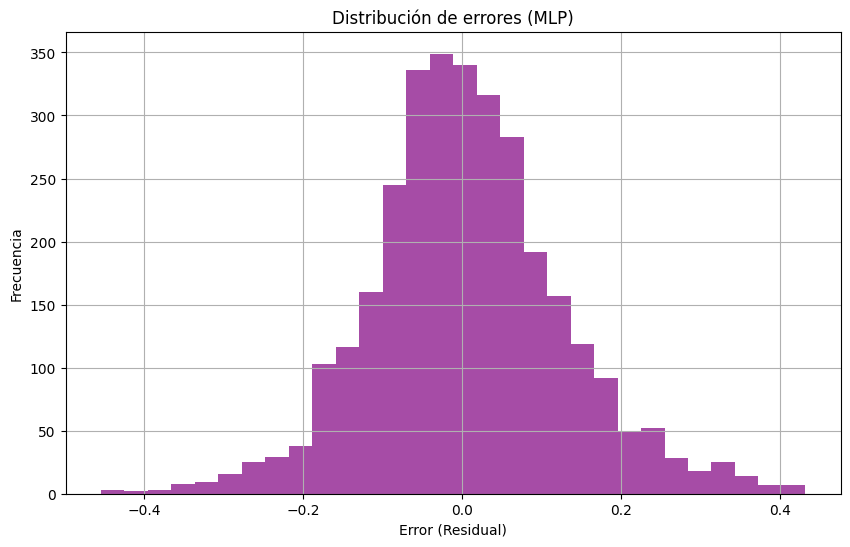

In [112]:
errors_mlp = y_test - y_pred_mlp

# Crear figura y eje
fig_mlp, ax_mlp = plt.subplots(figsize=(10, 6))

# Hacer la gráfica
ax_mlp.hist(errors_mlp, bins=30, color='purple',  alpha=0.7)
ax_mlp.set_title('Distribución de errores (MLP)')
ax_mlp.set_xlabel('Error (Residual)')
ax_mlp.set_ylabel('Frecuencia')
ax_mlp.grid(True)

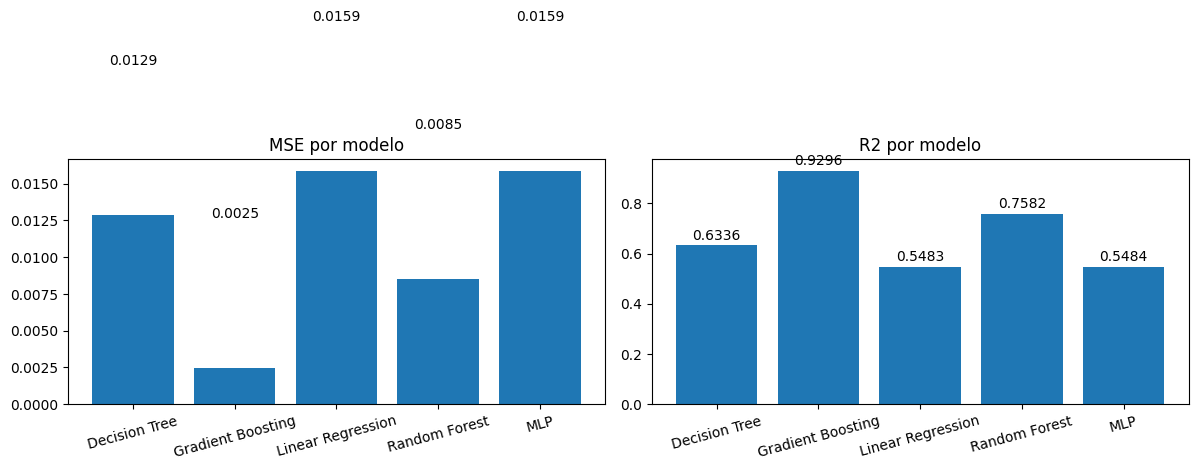

In [66]:
models = [ 'Decision Tree', 'Gradient Boosting', 'Linear Regression','Random Forest','MLP']
mse = [
      MSE_DT,
      MSE_GB,
      MSE_LR,
      MSE_RF,
      MSE_MLP]
r2 = [
      R2_DT,
      R2_GB,
      R2_LR,
      R2_RF,
      R2_MLP]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(models, mse)
for i, v in enumerate(mse):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom')
plt.title('MSE por modelo')
plt.xticks(rotation=15)
plt.subplot(1,2,2)
plt.bar(models, r2)
for i, v in enumerate(r2):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom')
plt.title('R2 por modelo')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

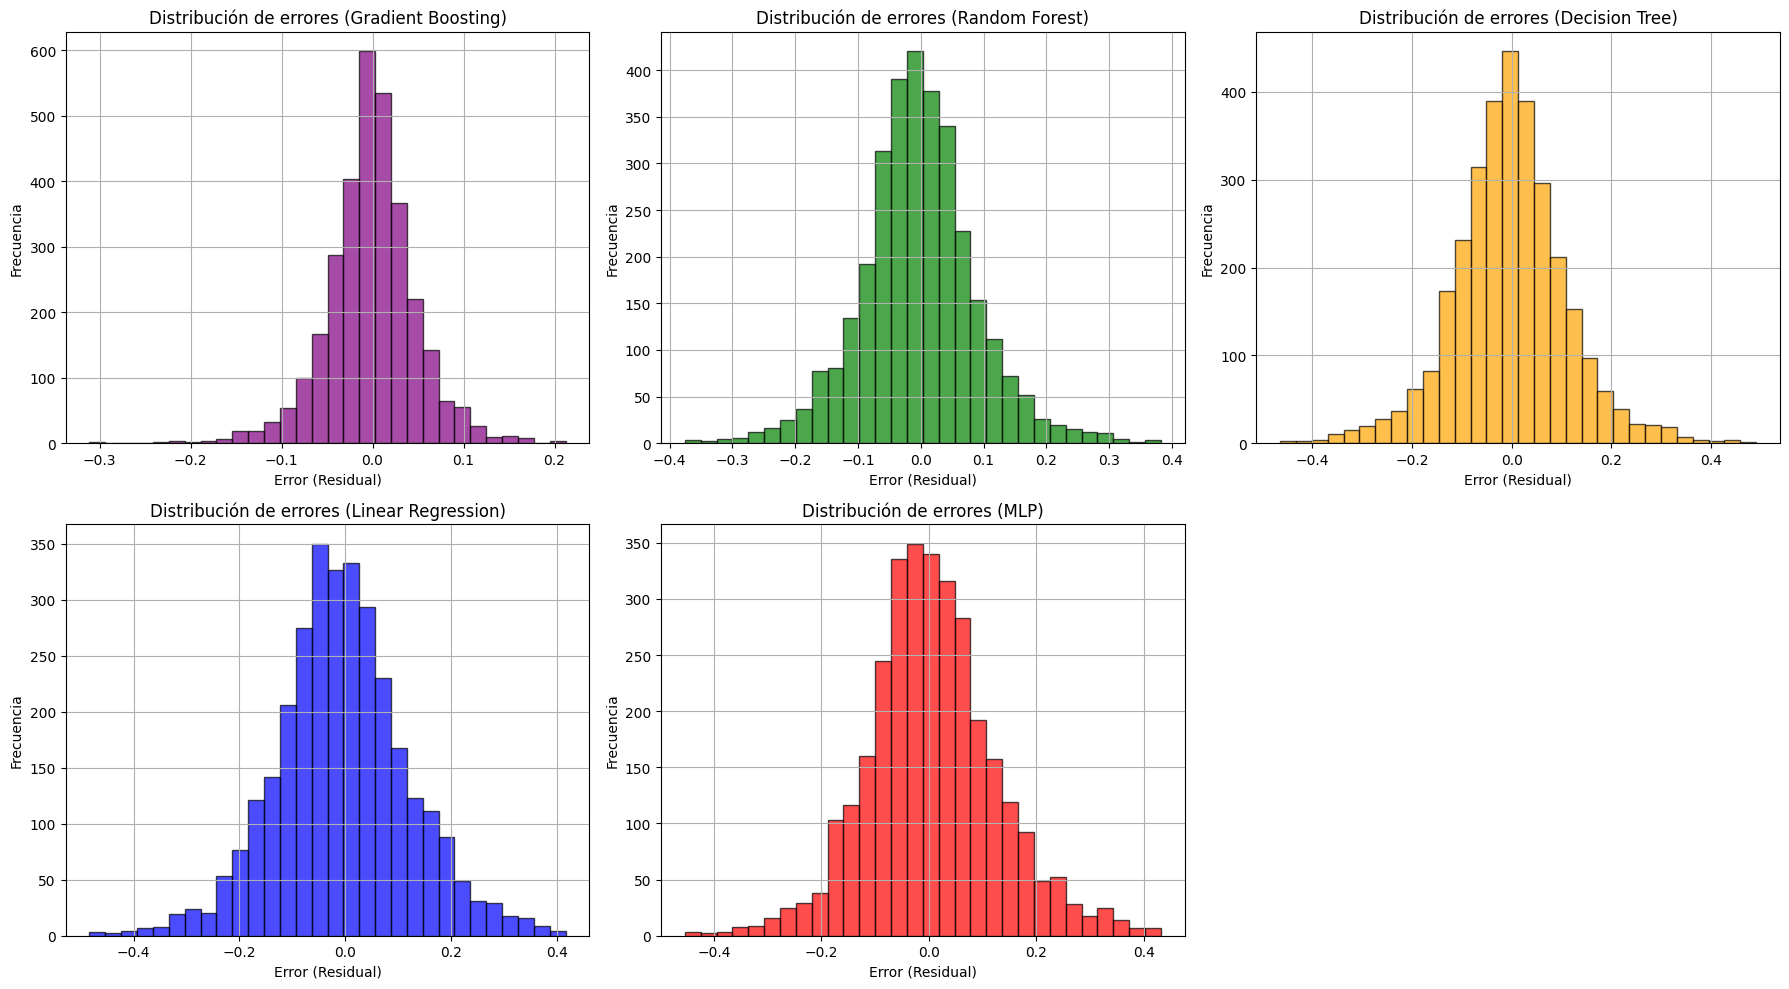

In [113]:
# Crear una figura grande para comparar todas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 filas, 3 columnas

# Graficar cada uno en su respectivo 'axes'
modelos = ['Gradient Boosting', 'Random Forest', 'Decision Tree', 'Linear Regression', 'MLP']
errores = [errors_gb, errors_rf, errors_dt, errors_lr, errors_mlp]
colores = ['purple', 'green', 'orange', 'blue', 'red']

for idx, ax in enumerate(axes.flat[:5]):  # Solo usas los primeros 5 espacios
    ax.hist(errores[idx], bins=30, color=colores[idx], edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribución de errores ({modelos[idx]})')
    ax.set_xlabel('Error (Residual)')
    ax.set_ylabel('Frecuencia')
    ax.grid(True)

# Eliminar el subplot vacío si no usas los 6 espacios
fig.delaxes(axes[1,2])  # Borra el último si solo tienes 5 modelos

plt.tight_layout()
plt.show()